# Exploratory Data Analysis of news articles dataset
Contributions: EDA conducted by Shaun, Samson and Yu Xiang, dataset compiled by news articles and youtube data scraping team

In [3]:
import pandas as pd
import re
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import string
import re
import nltk
nltk.download('stopwords')
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import gensim
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis

from dateutil import parser

C:\Users\hengs\Anaconda3\lib\site-packages\pandas\compat\_optional.py:138: UserWarning: Pandas requires version '2.7.0' or newer of 'numexpr' (version '2.6.9' currently installed).
  warnings.warn(msg, UserWarning)
C:\Users\hengs\Anaconda3\lib\site-packages\gensim\similarities\__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)
C:\Users\hengs\Anaconda3\lib\site-packages\sklearn\decomposition\_lda.py:28: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.2

## Combine news article data and YT data

In [2]:
news_df = pd.read_csv('news_articles_cleanedv5.csv')
news_df['Platform'] = 'News articles'
news_df.head()

title  \
0  'It took months to see the end of the tunnel':...   
1  'Everyone watching makes me feel uneasy': Stud...   
2  Singapore Mental Health Film Festival 2021 ret...   
3  Woman, 19, rescued after sitting on 27th-floor...   
4  'I wanted to push the aircon out and jump down...   

                                                 url tags        date  \
0  https://www.asiaone.com/lifestyle/it-took-mont...  NIL  05/06/2021   
1  https://www.asiaone.com/singapore/everyone-wat...  NIL  01/06/2021   
2  https://www.asiaone.com/lifestyle/singapore-me...  NIL  18/05/2021   
3  https://www.asiaone.com/singapore/woman-19-res...  NIL  09/04/2021   
4  https://www.asiaone.com/lifestyle/i-wanted-pus...  NIL  09/01/2021   

                                             content  covid news_source  \
0  When she first started gymnastics at the age o...  False    Asia One   
1  These days, Natasha Osman would sit in front o...  False    Asia One   
2  The Covid-19 pandemic has heightened concerns ...   True    Asia One   
3  Residents in Sengkang craned their necks as th...  False    Asia One   
4  In his 30s and at the peak of his life and car...  False    Asia One   

        Platform  
0  News articles  
1  News articles  
2  News articles  
3  News articles  
4  News articles

In [3]:
yt = pd.read_csv("YT data to be combined with news.csv", index_col=0)
yt['url'] = yt['url'].apply(lambda x: 'https://www.youtube.com/watch?v=' + x)
yt['tags'] = 'NIL'
yt['Platform'] = 'Youtube'
yt = yt[yt['content'].apply(lambda x: True if type(x) == str else False)]
yt.head()

title  \
0  COVID-19: Singapore authorities on how the men...   
1                Living with anxiety during Covid-19   
2  Singapore&#39;s TTSH, NCID step up measures to...   
3  COVID-19: Singapore healthcare workers had inc...   
4  How Do We Solve Mental Health Stigma in Singap...   

                                           url        date  \
0  https://www.youtube.com/watch?v=AIB_pFuSfpQ  06/08/2020   
1  https://www.youtube.com/watch?v=QShkVkVOlzs  10/10/2020   
2  https://www.youtube.com/watch?v=0tqzbTOM67U  27/04/2020   
3  https://www.youtube.com/watch?v=MUQs6chbiGc  14/04/2020   
4  https://www.youtube.com/watch?v=yxnmE-Aeulo  13/04/2021   

                                             content  covid  \
0  How are the mental health needs of migrant wor...   True   
1  Four Singaporeans share how Covid-19 had an im...   True   
2  Stress, anxiety and loneliness are just some f...   True   
3  New research has found that healthcare workers...   True   
4  This week, we sit down with Mr Eric Chua, Parl...  False   

         news_source tags Platform  
0                CNA  NIL  Youtube  
1  The Straits Times  NIL  Youtube  
2                CNA  NIL  Youtube  
3                CNA  NIL  Youtube  
4           TEAM NOC  NIL  Youtube

In [46]:
yt['title']

0       COVID-19: Singapore authorities on how the men...
1                     Living with anxiety during Covid-19
2       Singapore&#39;s TTSH, NCID step up measures to...
3       COVID-19: Singapore healthcare workers had inc...
4       How Do We Solve Mental Health Stigma in Singap...
                              ...                        
2166    Attending an offline event in Singapore ð¥  ...
2167                           Our Fight against COVID-19
2169          IPS Nathan Lecture II: "The Caring Economy"
2170    WORLD RECORD TRAVEL STORIES #8 - SINGAPORE- Wh...
2171    Chan Chun Sing on politics and governance | Th...
Name: title, Length: 2108, dtype: object

In [4]:
df = pd.concat([news_df, yt], ignore_index=True)
df.head()

title  \
0  'It took months to see the end of the tunnel':...   
1  'Everyone watching makes me feel uneasy': Stud...   
2  Singapore Mental Health Film Festival 2021 ret...   
3  Woman, 19, rescued after sitting on 27th-floor...   
4  'I wanted to push the aircon out and jump down...   

                                                 url tags        date  \
0  https://www.asiaone.com/lifestyle/it-took-mont...  NIL  05/06/2021   
1  https://www.asiaone.com/singapore/everyone-wat...  NIL  01/06/2021   
2  https://www.asiaone.com/lifestyle/singapore-me...  NIL  18/05/2021   
3  https://www.asiaone.com/singapore/woman-19-res...  NIL  09/04/2021   
4  https://www.asiaone.com/lifestyle/i-wanted-pus...  NIL  09/01/2021   

                                             content  covid news_source  \
0  When she first started gymnastics at the age o...  False    Asia One   
1  These days, Natasha Osman would sit in front o...  False    Asia One   
2  The Covid-19 pandemic has heightened concerns ...   True    Asia One   
3  Residents in Sengkang craned their necks as th...  False    Asia One   
4  In his 30s and at the peak of his life and car...  False    Asia One   

        Platform  
0  News articles  
1  News articles  
2  News articles  
3  News articles  
4  News articles

## Data cleaning
(contributed by Shaun and Yu Xiang)

In [5]:
df['date'] = pd.to_datetime(df['date'], format='%d/%m/%Y') #datetime conversion

In [7]:
# Removing URLs, non-alphabets, stopwords (incld custom ones) + lemmatise words

nltk_stopwords = nltk.corpus.stopwords.words('english')
nltk_stopwords.extend(['á', "s","â","â€”", "singapore","singaporean","sâ", "will", "said","one", 'could', 'would', 'may', 'also', 'say', 'like', 'right', 'know', 'think', 'well'])

def text_processor(text):
    # Remove HTML Tags
    try:
        text = html.document_fromstring(text).text_content()
    except:
        pass

    text = text.lower() #lower case
    text = re.sub(r'http\S+', '', text) #remove urls
    text = re.sub('[^a-zA-Z ]+', ' ', text) #remove non-alphabets
    # text = "".join([i for i in text if i not in string.punctuation]) #remove punctuations
    tokens  = re.split(' ', text) #split str into list
    tokens = [t for t in tokens if (t not in nltk_stopwords) and (len(t) > 2)] #remove stopwords and words less than 3 letters

    wordnet_lemmatizer = WordNetLemmatizer()
    lemmatised = [wordnet_lemmatizer.lemmatize(word) for word in tokens] #lemmatise

    output = " ".join(word for word in lemmatised)

    return output

df['cleaned_content'] = df['content'].apply(text_processor)

In [8]:
df.to_csv("news_articles_YT_cleaned_lemmatised_v6.csv")

In [50]:
# Example of before/after (first row):
print(df['content'][0][:200])
print("")
print(df['cleaned_content'][0][:200])

When she first started gymnastics at the age of eight, Joy Koh recalls being mesmerised by cartwheels and splits. But she was soon hit with a reality check. Subscribing to the "no pain, no gain" minds

first started gymnastics age eight joy koh recall mesmerised cartwheel split soon hit reality check subscribing pain gain mindset coach body shame push beyond limit year old tell asiaone child cry puk


## Basic EDA
(contributed by Shaun, Yu Xiang and Samson)

In [11]:
df = pd.read_csv("news_articles_YT_cleaned_lemmatised_v6.csv", index_col=0)
df['date'] = pd.to_datetime(df['date'])
df.head()

title  \
0  'It took months to see the end of the tunnel':...   
1  'Everyone watching makes me feel uneasy': Stud...   
2  Singapore Mental Health Film Festival 2021 ret...   
3  Woman, 19, rescued after sitting on 27th-floor...   
4  'I wanted to push the aircon out and jump down...   

                                                 url tags       date  \
0  https://www.asiaone.com/lifestyle/it-took-mont...  NIL 2021-06-05   
1  https://www.asiaone.com/singapore/everyone-wat...  NIL 2021-06-01   
2  https://www.asiaone.com/lifestyle/singapore-me...  NIL 2021-05-18   
3  https://www.asiaone.com/singapore/woman-19-res...  NIL 2021-04-09   
4  https://www.asiaone.com/lifestyle/i-wanted-pus...  NIL 2021-01-09   

                                             content  covid news_source  \
0  When she first started gymnastics at the age o...  False    Asia One   
1  These days, Natasha Osman would sit in front o...  False    Asia One   
2  The Covid-19 pandemic has heightened concerns ...   True    Asia One   
3  Residents in Sengkang craned their necks as th...  False    Asia One   
4  In his 30s and at the peak of his life and car...  False    Asia One   

        Platform                                    cleaned_content  
0  News articles  first started gymnastics age eight joy koh rec...  
1  News articles  day natasha osman sit front laptop finger fidd...  
2  News articles  covid pandemic heightened concern mental healt...  
3  News articles  resident sengkang craned neck watched rescue t...  
4  News articles  peak life career daniel lim world unravelled d...

Total number of articles/videos: 3085.
Covid-related: 1828; non-covid-related: 1257
Date range of articles/videos: 2008-11-23 to 2021-07-12
Total number of news articles: 977, total number of YT videos: 2108


Text(0.5, 1.0, 'Distribution of news articles/videos')

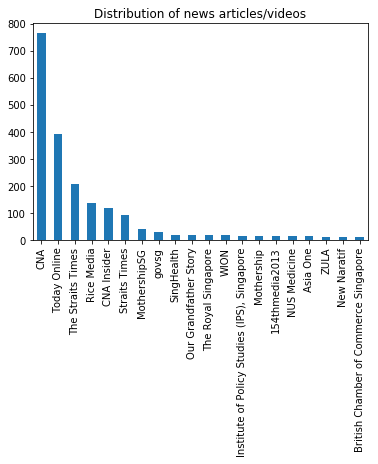

In [51]:
# Basic EDA + Distribution of articles/videos, by source
print("Total number of articles/videos: {}.\nCovid-related: {}; non-covid-related: {}".format(len(df), sum(df['covid']), len(df)-sum(df['covid'])))
print("Date range of articles/videos: {} to {}".format(str(min(df['date']))[:10], str(max(df['date']))[:10]))
print("Total number of news articles: {}, total number of YT videos: {}".format(len(news_df), len(yt)))
# print("Type of news source: {}".format(df.news_source.unique()))

source_count = df['news_source'].value_counts()
ax = source_count[source_count > 10].plot(kind='bar') #filter for source with >10 items
ax.set_title('Distribution of news articles/videos')

Text(0.5, 1.0, 'Monthly count of news articles/videos')

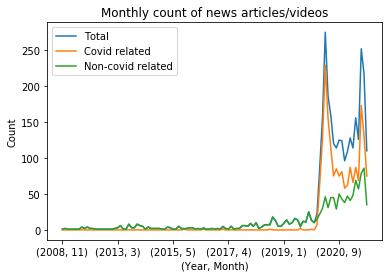

In [52]:
# Count of news articles/videos over time, split by covid-related and otherwise
count_date_all = df['date'].groupby([df.date.dt.year, df.date.dt.month]).agg('count') #df containing monthly count of articles
count_date_covid = df[df['covid']]['date'].groupby([df.date.dt.year, df.date.dt.month]).agg('count')
count_date_non_covid =df[~df['covid']]['date'].groupby([df.date.dt.year, df.date.dt.month]).agg('count')

count_df = pd.concat([count_date_all,count_date_covid, count_date_non_covid], axis=1)
count_df.columns = ['Total','Covid related','Non-covid related']
count_df.replace(np.NaN, 0, inplace=True)

ax = count_df.plot(kind='line')
ax.set_ylabel('Count')
ax.set_xlabel('(Year, Month)')
ax.set_title('Monthly count of news articles/videos')

# for n, label in enumerate(ax.xaxis.get_ticklabels()):
#     print(n,label)

In [53]:
kws = ['depression', 'mental illness', 'unalive' , 'social anxiety', 'loneliness',
'stress', 'lonely', 'isolation', 'suicide', 'abuse', 'death', 'post traumatic stress disorder',
'no motivation', 'therapy', 'trauma', 'counselling', 'mood disorder', 'mood swings',
'mental health', 'angst', 'emotion', 'phobia', 'addiction', 'stigma', 'self-harm',
'neurosis', 'disorder', 'dependence', 'socialize', 'help', 'dead', 'melancholia',
'dysthemia', 'tired', 'trapped', 'paranoia', 'overwhelmed', 'irritable', 'bipolar', 'psychologist', 'well-being',
'imh', 'sos', 'counsellor', 'toxic', 'insominia', 'drugs', 'fight','self-esteem']

#counting number of articles/titles containing keyword (+1 if appear in article at least once)
def kws_count(df_series, kws):
    data = {}
    for article in df_series:
        for kw in kws:
            if kw not in data:
                data[kw] = 0
            if kw in article.lower():
                data[kw] += 1

    print(data)

    df_count = pd.DataFrame(data.items(), columns = ["keywords","count"])
    df_count = df_count.sort_values("count",ascending = False)
    return df_count

print('Number of articles containing keyword')
kw_count_in_content_df = kws_count(df['content'], kws) 
print("")
print('Number of article titles containing keyword')
kw_count_in_title_df = kws_count(df['title'], kws)

Number of articles containing keyword
{'depression': 281, 'mental illness': 97, 'unalive': 0, 'social anxiety': 9, 'loneliness': 76, 'stress': 865, 'lonely': 91, 'isolation': 407, 'suicide': 201, 'abuse': 338, 'death': 596, 'post traumatic stress disorder': 3, 'no motivation': 3, 'therapy': 245, 'trauma': 162, 'counselling': 196, 'mood disorder': 11, 'mood swings': 13, 'mental health': 669, 'angst': 24, 'emotion': 524, 'phobia': 76, 'addiction': 70, 'stigma': 201, 'self-harm': 53, 'neurosis': 0, 'disorder': 268, 'dependence': 241, 'socialize': 110, 'help': 2116, 'dead': 367, 'melancholia': 3, 'dysthemia': 0, 'tired': 330, 'trapped': 122, 'paranoia': 56, 'overwhelmed': 180, 'irritable': 17, 'bipolar': 48, 'psychologist': 183, 'well-being': 399, 'imh': 117, 'sos': 85, 'counsellor': 109, 'toxic': 127, 'insominia': 0, 'drugs': 153, 'fight': 675, 'self-esteem': 30}

Number of article titles containing keyword
{'depression': 11, 'mental illness': 6, 'unalive': 0, 'social anxiety': 0, 'loneli

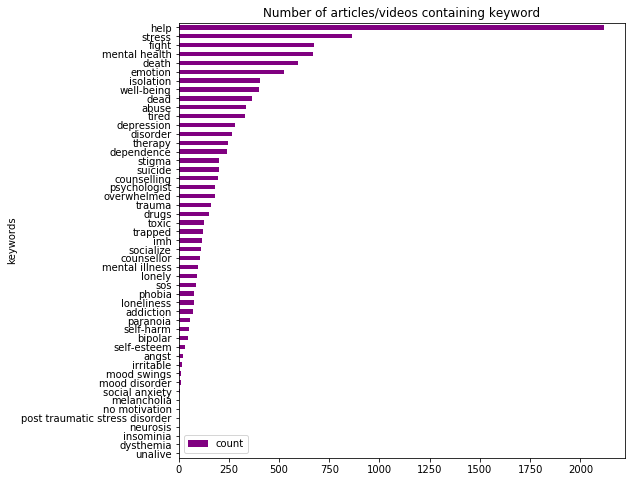

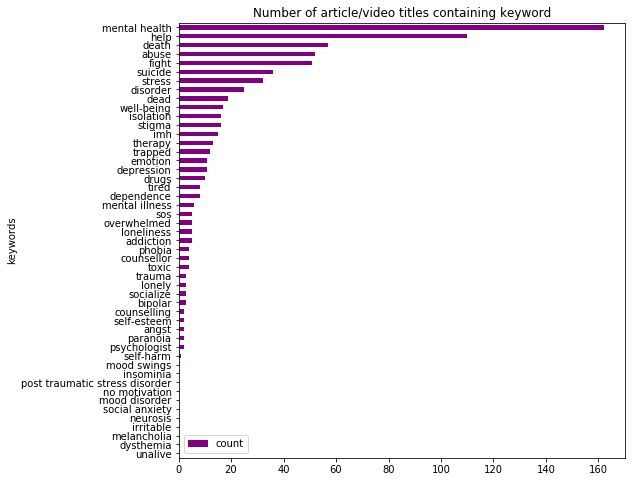

In [54]:
#plot horizontal bar graph of keyword counts
def kws_graph(kw_count_df, title):
    fig, ax = plt.subplots(figsize=(8, 8))

    kw_count_df.sort_values("count").plot.barh(x='keywords',
                      y='count',
                      ax=ax,
                      color="purple")

    ax.set_title(title)
    plt.show()

kws_graph(kw_count_in_content_df, "Number of articles/videos containing keyword")
kws_graph(kw_count_in_title_df, "Number of article/video titles containing keyword")

## Word Cloud
(contributed by Samson and Shaun)

In [13]:
# filter articles/videos by year (contributed by Shaun and Samson)
articles_2019 = df[(df.date >= parser.parse("01 Jan 2019")) & (df.date <= parser.parse("31 Dec 2019"))]
articles_2020 = df[(df.date >= parser.parse("01 Jan 2020")) & (df.date <= parser.parse("31 Dec 2020"))]
articles_2021 = df[(df.date >= parser.parse("01 Jan 2021")) & (df.date <= parser.parse("31 Dec 2021"))]

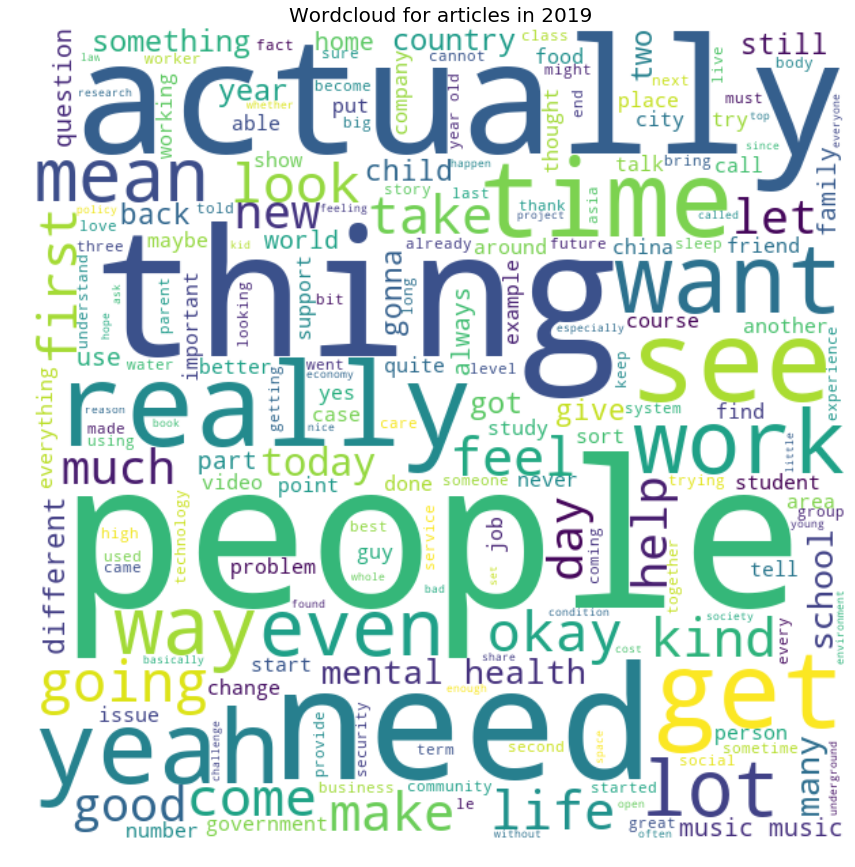

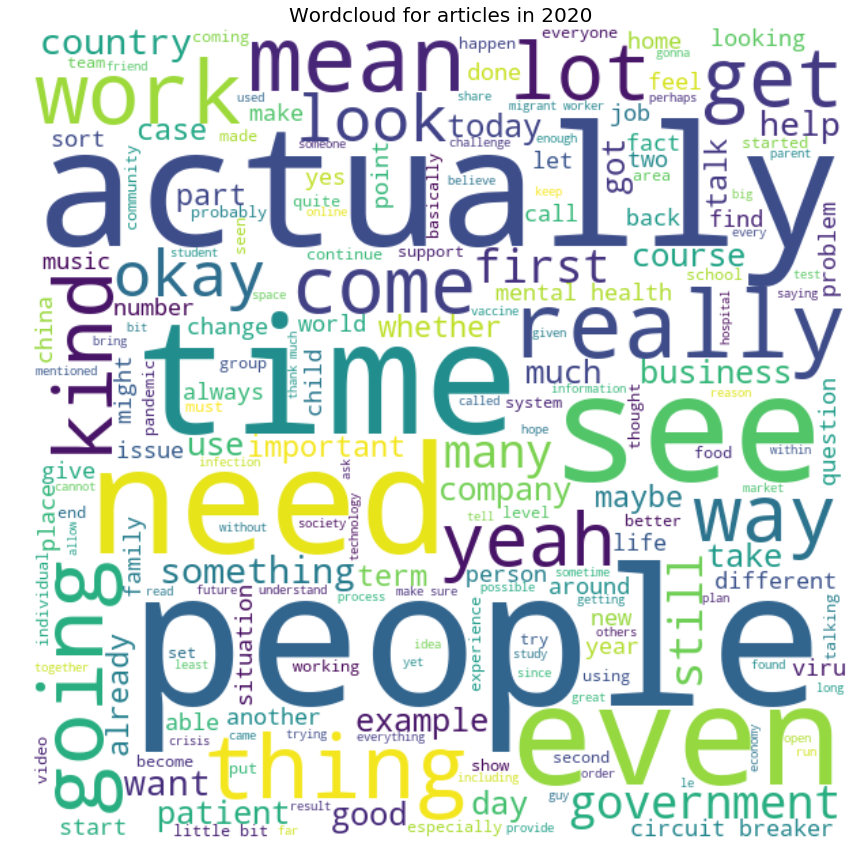

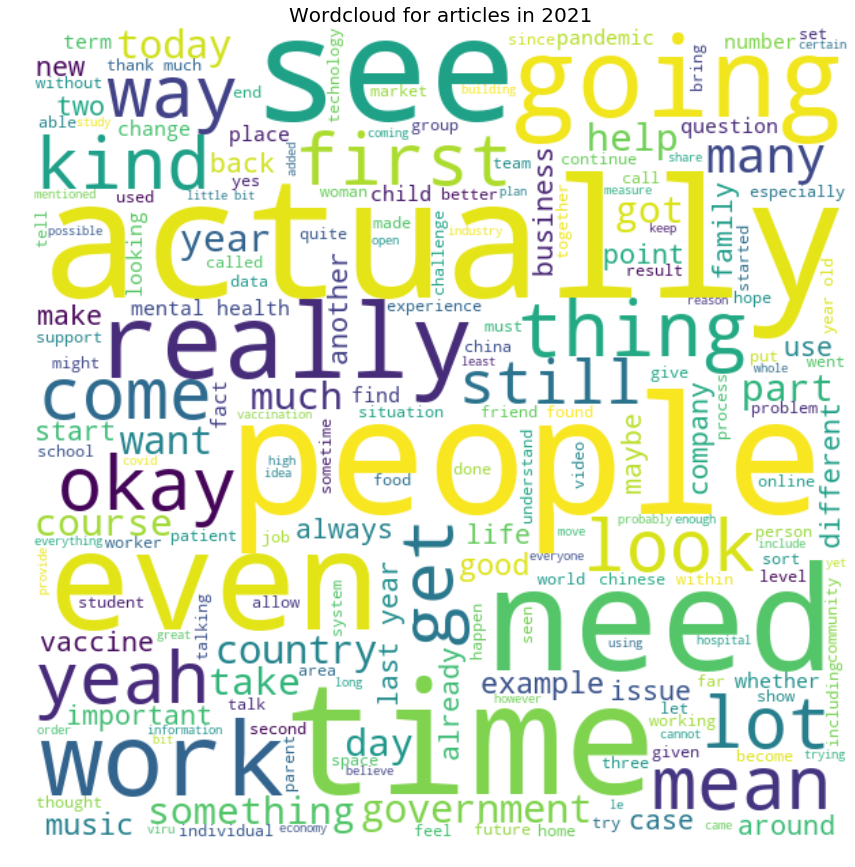

In [55]:
def create_wordcloud(text_series, title):
    
    wc = WordCloud(background_color = 'white', stopwords=nltk_stopwords, height = 600, width = 600)
    words = ' '.join(w for w in text_series)
    wc.generate(words)

    plt.figure(figsize=(15,15))
    plt.imshow(wc, interpolation='bilinear')
    plt.title(title, fontsize= 20)
    plt.axis('off')
    plt.show()

create_wordcloud(articles_2019['cleaned_content'], 'Wordcloud for articles in 2019')
create_wordcloud(articles_2020['cleaned_content'], 'Wordcloud for articles in 2020')
create_wordcloud(articles_2021['cleaned_content'], 'Wordcloud for articles in 2021') 

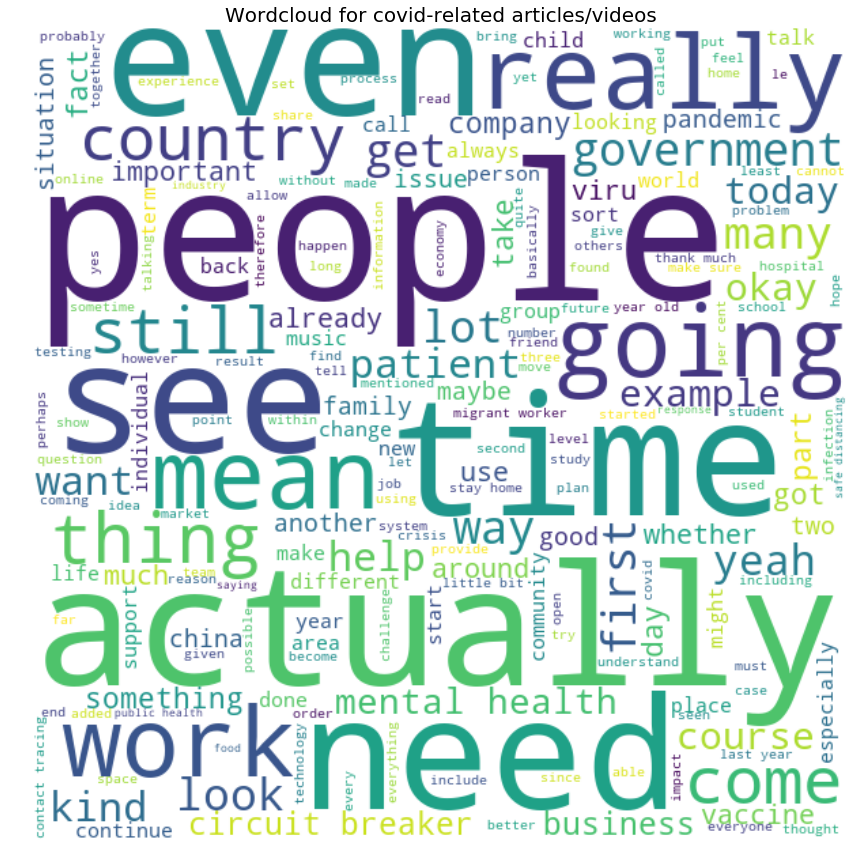

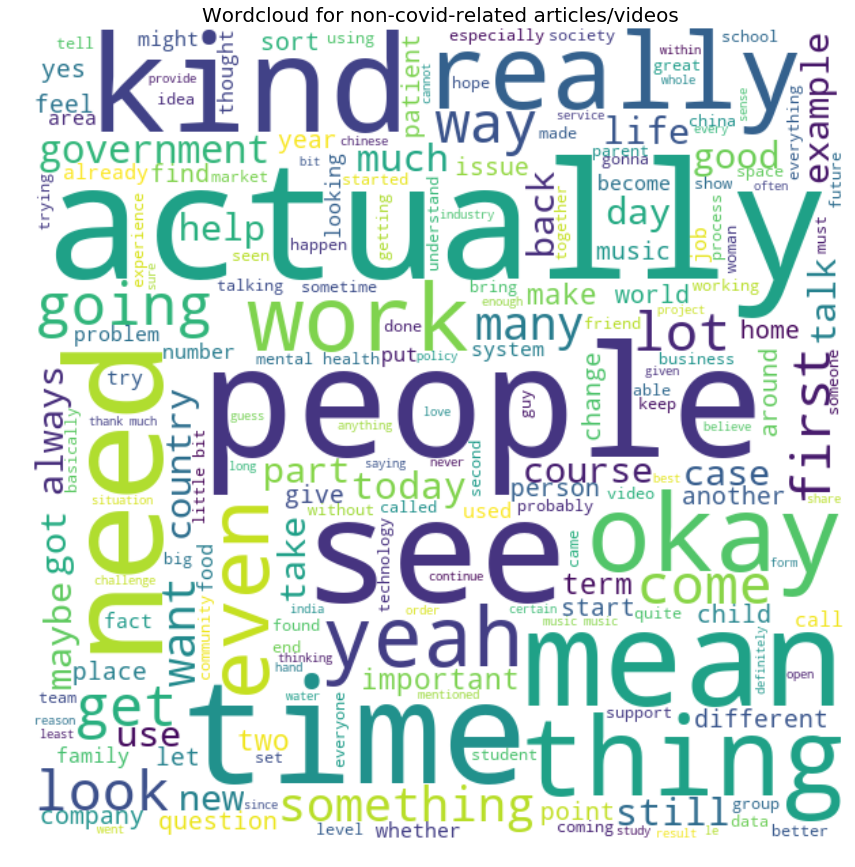

In [56]:
covid_articles = df[df['covid']]
non_covid_articles = df[~df['covid']]
create_wordcloud(covid_articles['cleaned_content'], 'Wordcloud for covid-related articles/videos')
create_wordcloud(non_covid_articles['cleaned_content'], 'Wordcloud for non-covid-related articles/videos')

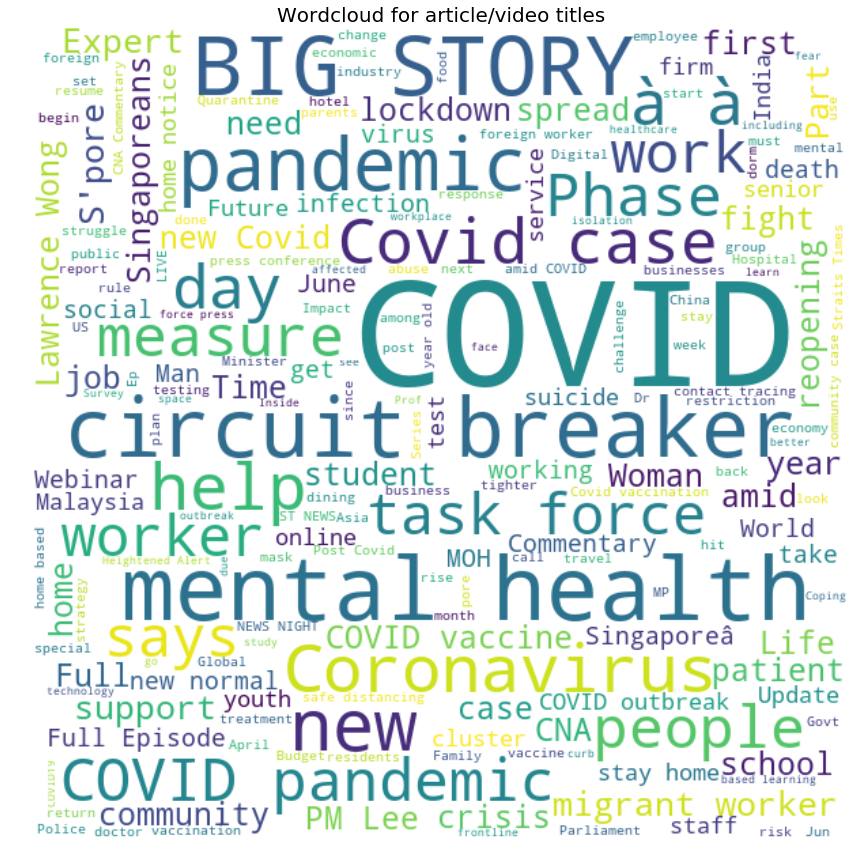

In [57]:
create_wordcloud(covid_articles['title'], 'Wordcloud for article/video titles')

## Topic Modelling (using LDA)
(contributed by Yu Xiang)

In [58]:
#LDA viz for topic modelling
def lda_viz(df_series, num_topics):
    corpus = df_series.apply(lambda x: x.split()) # corpus is a list of list of words
    
    dic = gensim.corpora.Dictionary(corpus)
    bow_corpus = [dic.doc2bow(doc) for doc in corpus]

    lda_model = gensim.models.LdaMulticore(bow_corpus, 
                                   num_topics = num_topics, 
                                   id2word = dic,                                    
                                   passes = 10,
                                   workers = 2)
    print(lda_model.show_topics())
    pyLDAvis.enable_notebook()
    viz = gensimvis.prepare(lda_model, bow_corpus, dic)
    return viz

In [59]:
##LDA for (processed) titles of articles
viz_title = lda_viz(df["title"].apply(text_processor), num_topics=4)
viz_title

[(0, '0.023*"covid" + 0.013*"home" + 0.012*"breaker" + 0.012*"circuit" + 0.009*"day" + 0.008*"new" + 0.005*"life" + 0.005*"help" + 0.005*"quarantine" + 0.005*"stay"'), (1, '0.025*"covid" + 0.016*"story" + 0.013*"big" + 0.008*"woman" + 0.008*"case" + 0.008*"time" + 0.006*"worker" + 0.005*"pore" + 0.005*"coronavirus" + 0.005*"new"'), (2, '0.036*"covid" + 0.020*"mental" + 0.017*"health" + 0.010*"cna" + 0.008*"worker" + 0.007*"new" + 0.006*"support" + 0.006*"pandemic" + 0.005*"full" + 0.005*"force"'), (3, '0.038*"covid" + 0.011*"pandemic" + 0.007*"health" + 0.007*"mental" + 0.007*"new" + 0.007*"episode" + 0.006*"full" + 0.005*"worker" + 0.005*"case" + 0.004*"vaccine"')]


C:\Users\hengs\Anaconda3\lib\site-packages\pyLDAvis\_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  by='saliency', ascending=False).head(R).drop('saliency', 1)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2     -0.079216  0.095117       1        1  29.174510
0     -0.079699 -0.109290       2        1  25.310407
3      0.052564  0.049880       3        1  23.936771
1      0.106351 -0.035707       4        1  21.578312, topic_info=        Term        Freq       Total Category  logprob  loglift
21    mental  181.000000  181.000000  Default  30.0000  30.0000
207    story  110.000000  110.000000  Default  29.0000  29.0000
17    health  164.000000  164.000000  Default  28.0000  28.0000
18      home  109.000000  109.000000  Default  27.0000  27.0000
1028     big  106.000000  106.000000  Default  26.0000  26.0000
...      ...         ...         ...      ...      ...      ...
156      new   23.563162  161.612742   Topic4  -5.3721  -0.3920
83      work   15.368466   54.010385   Topic4  -5.7995   0.2766
18      home   17.708372  109.001258   Topic4  -5.6577  -0.2838
1194    asia   13.117345   34.558900   Topic4  -5.9578   0.5648
154    force   13.176821   55.816253   Topic4  -5.9533   0.0899

[305 rows x 6 columns], token_table=      Topic      Freq       Term
term                            
221       1  0.927866   activity
2017      3  0.721261      alert
2017      4  0.240420      alert
70        3  0.138755  allegedly
70        4  0.832528  allegedly
...     ...       ...        ...
131       4  0.304653       year
786       1  0.761375      youth
786       2  0.173040      youth
786       3  0.069216      youth
3388      3  0.832007        zoo

[524 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 1, 4, 2])

In [60]:
viz_content = lda_viz(df["cleaned_content"], num_topics=4)
viz_content

[(0, '0.008*"yeah" + 0.008*"okay" + 0.008*"really" + 0.008*"people" + 0.007*"thing" + 0.007*"actually" + 0.007*"time" + 0.006*"see" + 0.005*"want" + 0.005*"lot"'), (1, '0.007*"year" + 0.007*"worker" + 0.005*"government" + 0.004*"time" + 0.004*"new" + 0.004*"support" + 0.004*"job" + 0.004*"people" + 0.004*"work" + 0.004*"need"'), (2, '0.008*"case" + 0.007*"people" + 0.006*"time" + 0.005*"need" + 0.005*"question" + 0.005*"country" + 0.004*"vaccine" + 0.004*"measure" + 0.004*"thank" + 0.004*"see"'), (3, '0.007*"health" + 0.007*"people" + 0.007*"mental" + 0.006*"time" + 0.005*"year" + 0.005*"family" + 0.005*"child" + 0.004*"help" + 0.004*"need" + 0.004*"home"')]


C:\Users\hengs\Anaconda3\lib\site-packages\pyLDAvis\_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  by='saliency', ascending=False).head(R).drop('saliency', 1)
C:\Users\hengs\Anaconda3\lib\site-packages\joblib\numpy_pickle.py:103: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  pickler.file_handle.write(chunk.tostring('C'))
C:\Users\hengs\Anaconda3\lib\site-packages\joblib\numpy_pickle.py:103: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  pickler.file_handle.write(chunk.tostring('C'))


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0     -0.059014 -0.043095       1        1  36.169593
2      0.034943 -0.030321       2        1  28.099950
1      0.063115  0.013535       3        1  19.048333
3     -0.039044  0.059880       4        1  16.682123, topic_info=          Term          Freq         Total Category  logprob  loglift
418     mental   4706.000000   4706.000000  Default  30.0000  30.0000
369     health   9772.000000   9772.000000  Default  29.0000  29.0000
1320    worker   8793.000000   8793.000000  Default  28.0000  28.0000
5470      yeah  13230.000000  13230.000000  Default  27.0000  27.0000
282       case  12209.000000  12209.000000  Default  26.0000  26.0000
...        ...           ...           ...      ...      ...      ...
412       many   1582.005016  10711.600222   Topic4  -5.9496  -0.1218
195        see   1728.980400  15010.850567   Topic4  -5.8607  -0.3704
234       want   1575.746524  12206.518085   Topic4  -5.9535  -0.2564
3     actually   1611.092537  15272.709630   Topic4  -5.9313  -0.4583
674        two   1535.449921  11233.651434   Topic4  -5.9794  -0.1993

[440 rows x 6 columns], token_table=       Topic      Freq      Term
term                            
3          1  0.629292  actually
3          2  0.231917  actually
3          3  0.033262  actually
3          4  0.105482  actually
24357      4  0.942699     alagu
...      ...       ...       ...
246        4  0.195628      year
3040       1  0.676459       yes
3040       2  0.191691       yes
3040       3  0.045571       yes
3040       4  0.086334       yes

[1206 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 3, 2, 4])

# Sentiment Analysis (using VADER)
(contirbuted by Yu Xiang)

In [18]:
def sentiment_analysis(df):
    df1 = df.copy()
    sid = SentimentIntensityAnalyzer()
    df1['score'] = df1["cleaned_content"].apply(lambda content: sid.polarity_scores(content))
    df1["compound"] = df1["score"].apply(lambda d:d['compound'])
    def label(score) :
        if score < -0.6:
            return 'Very negative'
        elif score < -0.05:
            return 'Negative'
        elif score < 0.05:
            return 'Neutral'
        elif score < 0.6:
            return "Positive"
        else:
            return 'Very positive'
    df1["label"] = df1["compound"].apply(lambda score: label(score))
    
    return df1

#Creating viz
def sentiment_hist(df):
    df["compound"].hist()

def sentiment_bar(df):
        plt.bar(df.label.value_counts().index,
        df.label.value_counts())

In [19]:
sentiments_2019 = sentiment_analysis(articles_2019)
sentiments_2020 = sentiment_analysis(articles_2020)
sentiments_2021 = sentiment_analysis(articles_2021)

In [20]:
# sentiments for 2019(pre-covid)
sentiments_2019.head()

title  \
14  'Her condition didn't look very bad': Pastor r...   
19  "Strong, United S'pore" only possible if menta...   
21  Festival aiming to combat mental health stigma...   
29  People living with mental health conditions ar...   
31  CPF says woman who can't withdraw savings for ...   

                                                  url tags       date  \
14  https://www.asiaone.com/entertainment/her-cond...  NIL 2019-10-21   
19  https://mothership.sg/2019/02/anthea-ong-menta...  NIL 2019-02-27   
21  https://mothership.sg/2019/09/beyond-the-label...  NIL 2019-09-19   
29  https://mothership.sg/2019/10/mental-health-ncss/  NIL 2019-10-16   
31  https://mothership.sg/2019/03/cpf-mental-healt...  NIL 2019-03-14   

                                              content  covid news_source  \
14  In the wake of Korean singer-actress Sulli's d...  False    Asia One   
19   While other MPs kicked off the Budget 2019 de...  False  Mothership   
21   Talking about mental health issues can be a c...  False  Mothership   
29   Talking about mental health issues can be a c...  False  Mothership   
31   The Central Provident Fund (CPF) Board has re...  False  Mothership   

         Platform                                    cleaned_content  \
14  News articles  wake korean singer actress sulli death oct cel...   
19  News articles  mp kicked budget debate discussing various asp...   
21  News articles  talking mental health issue challenge stigma h...   
29  News articles  talking mental health issue challenge stigma s...   
31  News articles  central provident fund cpf board responded cla...   

                                                score  compound          label  
14  {'neg': 0.235, 'neu': 0.564, 'pos': 0.202, 'co...   -0.9313  Very negative  
19  {'neg': 0.143, 'neu': 0.696, 'pos': 0.161, 'co...   -0.6773  Very negative  
21  {'neg': 0.077, 'neu': 0.743, 'pos': 0.18, 'com...    0.9950  Very positive  
29  {'neg': 0.062, 'neu': 0.714, 'pos': 0.223, 'co...    0.9936  Very positive  
31  {'neg': 0.111, 'neu': 0.81, 'pos': 0.078, 'com...   -0.9423  Very negative

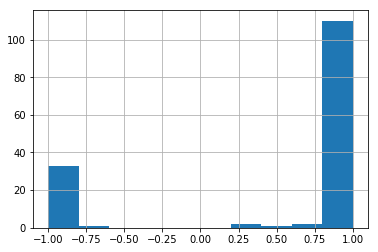

In [21]:
sentiment_hist(sentiments_2019)

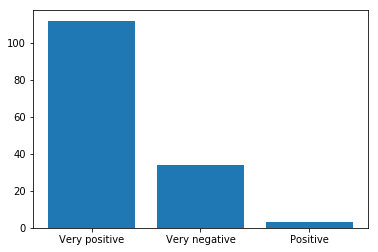

In [22]:
sentiment_bar(sentiments_2019)

In [23]:
# sentiments for 2020(covid)
sentiments_2020.head()

title  \
5  Chew Chor Meng thought of ending his life whil...   
6  Teetering on the edge: Woman rescued from ledg...   
7  Eleanor Lee: Why is it an insult if I turn out...   
8  Woman allegedly threatens suicide after quarre...   
9  'Right to disconnect' from work should be cons...   

                                                 url tags       date  \
5  https://www.asiaone.com/entertainment/chew-cho...  NIL 2020-11-13   
6  https://www.asiaone.com/singapore/teetering-ed...  NIL 2020-10-29   
7  https://www.asiaone.com/entertainment/eleanor-...  NIL 2020-10-16   
8  https://www.asiaone.com/singapore/woman-allege...  NIL 2020-09-04   
9  https://www.asiaone.com/singapore/right-discon...  NIL 2020-09-01   

                                             content  covid news_source  \
5  He once had it all � fame, money, success � bu...  False    Asia One   
6  A 42-year-old woman sitting on a ledge at the ...  False    Asia One   
7  When she was a little girl growing up in a sin...  False    Asia One   
8  A 50-year-old woman who allegedly threatened s...  False    Asia One   
9  Working from home has become a new norm for ma...   True    Asia One   

        Platform                                    cleaned_content  \
5  News articles  fame money success came crashing including hea...   
6  News articles  year old woman sitting ledge vertex building r...   
7  News articles  little girl growing single parent family mothe...   
8  News articles  year old woman allegedly threatened suicide qu...   
9  News articles  working home become new norm many since circui...   

                                               score  compound          label  
5  {'neg': 0.149, 'neu': 0.632, 'pos': 0.22, 'com...    0.9720  Very positive  
6  {'neg': 0.046, 'neu': 0.763, 'pos': 0.191, 'co...    0.9493  Very positive  
7  {'neg': 0.174, 'neu': 0.667, 'pos': 0.16, 'com...   -0.6786  Very negative  
8  {'neg': 0.213, 'neu': 0.646, 'pos': 0.141, 'co...   -0.9666  Very negative  
9  {'neg': 0.175, 'neu': 0.681, 'pos': 0.144, 'co...   -0.7351  Very negative

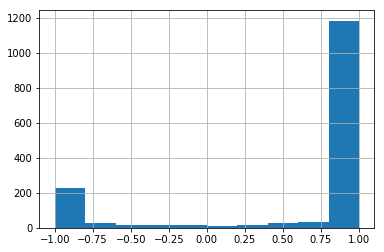

In [24]:
sentiment_hist(sentiments_2020)

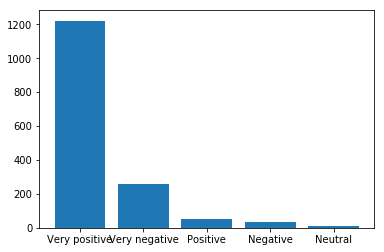

In [25]:
sentiment_bar(sentiments_2020)

In [26]:
# sentiments for 2021(late_covid)
sentiments_2021.head()

title  \
0  'It took months to see the end of the tunnel':...   
1  'Everyone watching makes me feel uneasy': Stud...   
2  Singapore Mental Health Film Festival 2021 ret...   
3  Woman, 19, rescued after sitting on 27th-floor...   
4  'I wanted to push the aircon out and jump down...   

                                                 url tags       date  \
0  https://www.asiaone.com/lifestyle/it-took-mont...  NIL 2021-06-05   
1  https://www.asiaone.com/singapore/everyone-wat...  NIL 2021-06-01   
2  https://www.asiaone.com/lifestyle/singapore-me...  NIL 2021-05-18   
3  https://www.asiaone.com/singapore/woman-19-res...  NIL 2021-04-09   
4  https://www.asiaone.com/lifestyle/i-wanted-pus...  NIL 2021-01-09   

                                             content  covid news_source  \
0  When she first started gymnastics at the age o...  False    Asia One   
1  These days, Natasha Osman would sit in front o...  False    Asia One   
2  The Covid-19 pandemic has heightened concerns ...   True    Asia One   
3  Residents in Sengkang craned their necks as th...  False    Asia One   
4  In his 30s and at the peak of his life and car...  False    Asia One   

        Platform                                    cleaned_content  \
0  News articles  first started gymnastics age eight joy koh rec...   
1  News articles  day natasha osman sit front laptop finger fidd...   
2  News articles  covid pandemic heightened concern mental healt...   
3  News articles  resident sengkang craned neck watched rescue t...   
4  News articles  peak life career daniel lim world unravelled d...   

                                               score  compound          label  
0  {'neg': 0.135, 'neu': 0.622, 'pos': 0.243, 'co...    0.9925  Very positive  
1  {'neg': 0.139, 'neu': 0.715, 'pos': 0.147, 'co...    0.5839       Positive  
2  {'neg': 0.127, 'neu': 0.71, 'pos': 0.164, 'com...    0.9217  Very positive  
3  {'neg': 0.114, 'neu': 0.716, 'pos': 0.17, 'com...    0.7845  Very positive  
4  {'neg': 0.145, 'neu': 0.674, 'pos': 0.182, 'co...    0.9758  Very positive

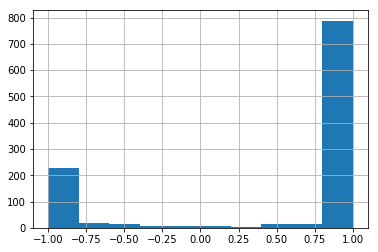

In [27]:
sentiment_hist(sentiments_2021)

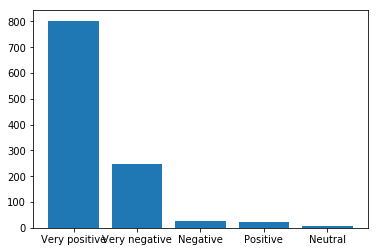

In [28]:
sentiment_bar(sentiments_2021)

C:\Users\hengs\Anaconda3\lib\site-packages\seaborn\relational.py:691: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  null_ci = pd.Series(index=["low", "high"], dtype=np.float)
C:\Users\hengs\Anaconda3\lib\site-packages\seaborn\relational.py:691: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  null_ci = pd.Series(index=["low", "high"], dtype=

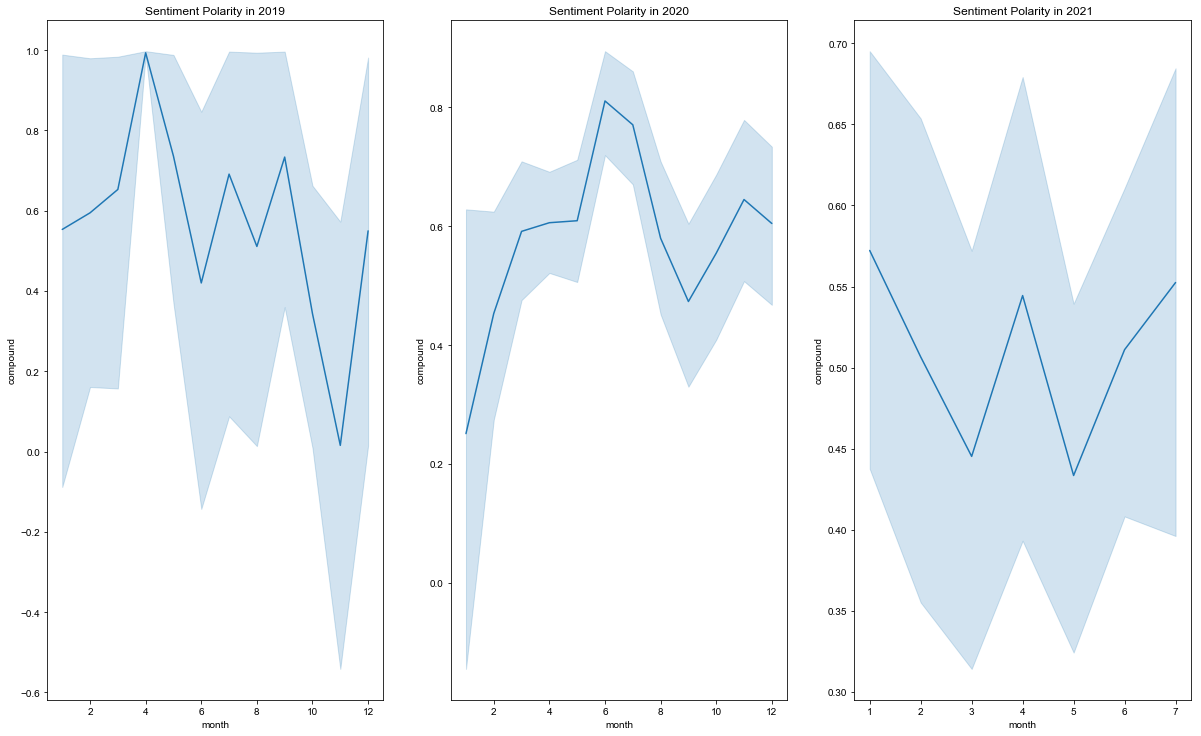

In [29]:
sentiments_2019["month"] = pd.DatetimeIndex(sentiments_2019['date']).month
sentiments_2020["month"] = pd.DatetimeIndex(sentiments_2020['date']).month
sentiments_2021["month"] = pd.DatetimeIndex(sentiments_2021['date']).month

fig, axs =plt.subplots(ncols=3)
sns.set(rc={'figure.figsize':(11.7,8.27)})
fig.set_size_inches(20.5, 12.5, forward=True)
sns.lineplot(data=sentiments_2019, x="month", y=sentiments_2019["compound"] ,ax= axs[0]).set_title("Sentiment Polarity in 2019");
sns.lineplot(data=sentiments_2020, x="month", y=sentiments_2020["compound"], ax= axs[1]).set_title("Sentiment Polarity in 2020");
sns.lineplot(data=sentiments_2021, x="month", y=sentiments_2021["compound"] ,ax= axs[2]).set_title("Sentiment Polarity in 2021");

## Empath analysis 
(contributed by Samson)

In [32]:
from empath import Empath
lexicon = Empath()

def empathy(text):
    analysis = lexicon.analyze(text, normalize=True)
    return analysis

In [36]:
df['empath_weights'] = df['cleaned_content'].apply(empathy)
df['empath'] = df['empath_weights'].apply(lambda x: [key for key, value in x.items()])
df.head()

title  \
0  'It took months to see the end of the tunnel':...   
1  'Everyone watching makes me feel uneasy': Stud...   
2  Singapore Mental Health Film Festival 2021 ret...   
3  Woman, 19, rescued after sitting on 27th-floor...   
4  'I wanted to push the aircon out and jump down...   

                                                 url tags       date  \
0  https://www.asiaone.com/lifestyle/it-took-mont...  NIL 2021-06-05   
1  https://www.asiaone.com/singapore/everyone-wat...  NIL 2021-06-01   
2  https://www.asiaone.com/lifestyle/singapore-me...  NIL 2021-05-18   
3  https://www.asiaone.com/singapore/woman-19-res...  NIL 2021-04-09   
4  https://www.asiaone.com/lifestyle/i-wanted-pus...  NIL 2021-01-09   

                                             content  covid news_source  \
0  When she first started gymnastics at the age o...  False    Asia One   
1  These days, Natasha Osman would sit in front o...  False    Asia One   
2  The Covid-19 pandemic has heightened concerns ...   True    Asia One   
3  Residents in Sengkang craned their necks as th...  False    Asia One   
4  In his 30s and at the peak of his life and car...  False    Asia One   

        Platform                                    cleaned_content  \
0  News articles  first started gymnastics age eight joy koh rec...   
1  News articles  day natasha osman sit front laptop finger fidd...   
2  News articles  covid pandemic heightened concern mental healt...   
3  News articles  resident sengkang craned neck watched rescue t...   
4  News articles  peak life career daniel lim world unravelled d...   

                                              empath  \
0  [help, office, dance, money, wedding, domestic...   
1  [help, office, dance, money, wedding, domestic...   
2  [help, office, dance, money, wedding, domestic...   
3  [help, office, dance, money, wedding, domestic...   
4  [help, office, dance, money, wedding, domestic...   

                                      empath_weights  
0  {'help': 0.005698005698005698, 'office': 0.0, ...  
1  {'help': 0.01675041876046901, 'office': 0.0150...  
2  {'help': 0.022304832713754646, 'office': 0.011...  
3  {'help': 0.04424778761061947, 'office': 0.0, '...  
4  {'help': 0.011560693641618497, 'office': 0.011...

In [34]:
df['empath_weights'] = df['empath']

title  \
0  'It took months to see the end of the tunnel':...   
1  'Everyone watching makes me feel uneasy': Stud...   
2  Singapore Mental Health Film Festival 2021 ret...   
3  Woman, 19, rescued after sitting on 27th-floor...   
4  'I wanted to push the aircon out and jump down...   

                                                 url tags       date  \
0  https://www.asiaone.com/lifestyle/it-took-mont...  NIL 2021-06-05   
1  https://www.asiaone.com/singapore/everyone-wat...  NIL 2021-06-01   
2  https://www.asiaone.com/lifestyle/singapore-me...  NIL 2021-05-18   
3  https://www.asiaone.com/singapore/woman-19-res...  NIL 2021-04-09   
4  https://www.asiaone.com/lifestyle/i-wanted-pus...  NIL 2021-01-09   

                                             content  covid news_source  \
0  When she first started gymnastics at the age o...  False    Asia One   
1  These days, Natasha Osman would sit in front o...  False    Asia One   
2  The Covid-19 pandemic has heightened concerns ...   True    Asia One   
3  Residents in Sengkang craned their necks as th...  False    Asia One   
4  In his 30s and at the peak of his life and car...  False    Asia One   

        Platform                                    cleaned_content  \
0  News articles  first started gymnastics age eight joy koh rec...   
1  News articles  day natasha osman sit front laptop finger fidd...   
2  News articles  covid pandemic heightened concern mental healt...   
3  News articles  resident sengkang craned neck watched rescue t...   
4  News articles  peak life career daniel lim world unravelled d...   

                                              empath  \
0  {'help': 0.005698005698005698, 'office': 0.0, ...   
1  {'help': 0.01675041876046901, 'office': 0.0150...   
2  {'help': 0.022304832713754646, 'office': 0.011...   
3  {'help': 0.04424778761061947, 'office': 0.0, '...   
4  {'help': 0.011560693641618497, 'office': 0.011...   

                                      empath_weights  
0  {'help': 0.005698005698005698, 'office': 0.0, ...  
1  {'help': 0.01675041876046901, 'office': 0.0150...  
2  {'help': 0.022304832713754646, 'office': 0.011...  
3  {'help': 0.04424778761061947, 'office': 0.0, '...  
4  {'help': 0.011560693641618497, 'office': 0.011...

Combining with sentiment analysis...

In [38]:
df = sentiment_analysis(df)
df.head(3)

title  \
0  'It took months to see the end of the tunnel':...   
1  'Everyone watching makes me feel uneasy': Stud...   
2  Singapore Mental Health Film Festival 2021 ret...   

                                                 url tags       date  \
0  https://www.asiaone.com/lifestyle/it-took-mont...  NIL 2021-06-05   
1  https://www.asiaone.com/singapore/everyone-wat...  NIL 2021-06-01   
2  https://www.asiaone.com/lifestyle/singapore-me...  NIL 2021-05-18   

                                             content  covid news_source  \
0  When she first started gymnastics at the age o...  False    Asia One   
1  These days, Natasha Osman would sit in front o...  False    Asia One   
2  The Covid-19 pandemic has heightened concerns ...   True    Asia One   

        Platform                                    cleaned_content  \
0  News articles  first started gymnastics age eight joy koh rec...   
1  News articles  day natasha osman sit front laptop finger fidd...   
2  News articles  covid pandemic heightened concern mental healt...   

                                              empath  \
0  [help, office, dance, money, wedding, domestic...   
1  [help, office, dance, money, wedding, domestic...   
2  [help, office, dance, money, wedding, domestic...   

                                      empath_weights  \
0  {'help': 0.005698005698005698, 'office': 0.0, ...   
1  {'help': 0.01675041876046901, 'office': 0.0150...   
2  {'help': 0.022304832713754646, 'office': 0.011...   

                                               score  compound          label  
0  {'neg': 0.135, 'neu': 0.622, 'pos': 0.243, 'co...    0.9925  Very positive  
1  {'neg': 0.139, 'neu': 0.715, 'pos': 0.147, 'co...    0.5839       Positive  
2  {'neg': 0.127, 'neu': 0.71, 'pos': 0.164, 'com...    0.9217  Very positive

In [39]:
df.to_csv("news_articles_YT_empath_sentiment_analyses.csv")

In [44]:
dic = {}

for x in df['empath_weights']:
    for key, value in x.items():
        if key in dic:
            dic[key] += value
        else:
            dic[key] = value

dict(list(dic.items())[:5]) # display first 5 elements in dic

{'help': 46.54489602958224,
 'office': 29.298763254006424,
 'dance': 23.44291914679197,
 'money': 39.71411942107104,
 'wedding': 24.472533426560446}

In [45]:
result = pd.DataFrame.from_dict(dic, orient='index', columns=['Score'])
result = result.sort_values(by = 'Score', ascending=False)[:20]
result

Score
business           104.646388
health              86.799497
work                74.313639
giving              56.707526
school              56.463058
medical_emergency   56.015243
communication       53.682418
economics           52.429372
speaking            50.504933
college             50.488362
children            49.337505
occupation          48.960519
help                46.544896
government          44.839051
family              43.969087
positive_emotion    43.880533
social_media        43.249019
negative_emotion    43.036521
banking             41.396778
traveling           40.208269

C:\Users\hengs\Anaconda3\lib\site-packages\seaborn\categorical.py:339: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  np.asarray(s, dtype=np.float)
C:\Users\hengs\Anaconda3\lib\site-packages\seaborn\categorical.py:339: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  np.asarray(s, dtype=np.float)
C:\Users\hengs\Anaconda3\lib\site-packages\sea

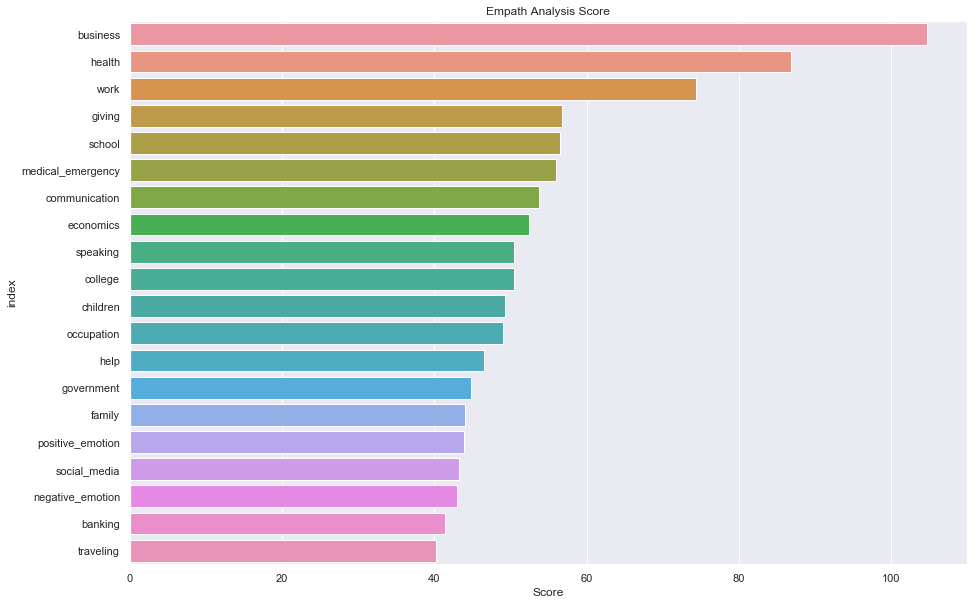

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns 

fig, ax = plt.subplots(figsize=(15, 10))
plt.title("Empath Analysis Score")

# sns.set_theme(style="whitegrid")
ax = sns.barplot(y = "index", x ="Score", data= result.reset_index())

plt.show()